# <font color="blue">Project - Machine Learning </font>

Please use this notebook for your answers. Add your charts/graphs/code where necessary.

**PROJECT requirements: prepare followings**
1. Prepare proposal
2. Literature matrix
3. IPYNB code file
4. Max 1 page explanation of your ML code
5. Rename this notebook as **lastname_firstname_ML.ipynb** and send it to the email adress: metin.yavuz@boun.edu.tr
6. Deadline: Final date determined by the Bogaziçi University

## Question 

This data set concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 1 categorical, 2 multivalued discrete and 5 continuous attributes.

Attribute Information:<br>
1. **mpg**: (miles per gallon) continuous 
2. **cylinders**: (# of cylinders) multi-valued discrete 
3. **displacement**: (Engine disp cubic inches) continuous 
4. **horsepower**: (HP) continuous 
5. **weight**: (lbs) continuous 
6. **acceleration**: (time -sec- to accelerate from 0 to 60 mph) continuous 
7. **model year**: (82 = 1982) multi-valued discrete 
8. **origin**: (US, Europe, Japan) categorical 

We've seen this example in class and it was a regression problem for which we tried to estimate the MPG value based on some attributes. We Will now convert this into a classification problem. Using the same data file (**auto-mpg.csv**), suppose we're trying to predict whether the fuel consumption is **high** or **low** based on the same predictors that we used in computing a numerical prediction for the target variable **mpg**. 

The target variable **mpg** will now be converted into a categorical feature with values **high** and **low**. In determining the threshold for separating low from high, use the **median value** of **mpg** for a balanced dataset.

Once you have your training and test datasets, compute the classification accuracy of your model for the test set and provide an interpretation on your findings.

You're expected to try the following classifiers:<br>
* **Logistic Regression**
* **kNN**
* **Random Forest**

Which classifier gives you the best accuracy? Please remember to tune your hyperparameters for the best performance.

In [266]:
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

In [267]:
import pandas as pd
auto = pd.read_csv("auto-mpg.csv")
auto.head(5)

,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [268]:
#Checking unwanted symbol
mpg_missing_ind = auto[auto.mpg=='?'].index
auto.loc[mpg_missing_ind]

,mpg,cyl,disp,hp,weight,acc,year,origin


In [269]:
cyl_missing_ind = auto[auto.cyl=='?'].index
auto.loc[cyl_missing_ind]

,mpg,cyl,disp,hp,weight,acc,year,origin


In [270]:
disp_missing_ind = auto[auto.disp=='?'].index
auto.loc[disp_missing_ind]

,mpg,cyl,disp,hp,weight,acc,year,origin


In [271]:
hp_missing_ind = auto[auto.hp=='?'].index
auto.loc[hp_missing_ind]

,mpg,cyl,disp,hp,weight,acc,year,origin


In [272]:
weight_missing_ind = auto[auto.weight=='?'].index
auto.loc[weight_missing_ind]

,mpg,cyl,disp,hp,weight,acc,year,origin


In [273]:
acc_missing_ind = auto[auto.acc=='?'].index
auto.loc[acc_missing_ind]

,mpg,cyl,disp,hp,weight,acc,year,origin


In [274]:
year_missing_ind = auto[auto.year=='?'].index
auto.loc[year_missing_ind]

,mpg,cyl,disp,hp,weight,acc,year,origin


In [275]:
origin_missing_ind = auto[auto.origin=='?'].index
auto.loc[origin_missing_ind]

,mpg,cyl,disp,hp,weight,acc,year,origin


In [276]:
#There is no unwanted symbol now, but if it was, we could do following
import numpy as np
#Lets convert the unwanted symbol to nan
auto = auto.replace('?',np.nan)
auto.isna().sum()

mpg       0
cyl       0
disp      0
hp        0
weight    0
acc       0
year      0
origin    0
dtype: int64

In [277]:
#Check for datatypes and null values
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   weight  398 non-null    float64
 5   acc     398 non-null    float64
 6   year    398 non-null    int64  
 7   origin  398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


In [278]:
auto.describe()
#This code will also give median value of mpg to divide it into low and high

,mpg,cyl,disp,hp,weight,acc,year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [279]:
#Let us get a detailed information about each column
print(auto.mpg.value_counts())
print(auto.cyl.value_counts())
print(auto.disp.value_counts())
print(auto.hp.value_counts())
print(auto.weight.value_counts())
print(auto.acc.value_counts())
print(auto.year.value_counts())
print(auto.origin.value_counts())

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64
4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64
97.0     21
98.0     18
350.0    18
250.0    17
318.0    17
         ..
68.0      1
155.0     1
96.0      1
97.5      1
114.0     1
Name: disp, Length: 82, dtype: int64
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
116.0     1
167.0     1
158.0     1
137.0     1
94.0      1
Name: hp, Length: 94, dtype: int64
2130.0    4
1985.0    4
2265.0    3
2125.0    3
2720.0    3
         ..
2215.0    1
2585.0    1
3850.0    1
3449.0    1
3504.0    1
Name: weight, Length: 351, dtype: int64
14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
17.1     1
24.6     1
23.5     1
16.1     1
15.6     1
Name: acc, Length: 95, dtype: int64
73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28


Correlation Matrix:

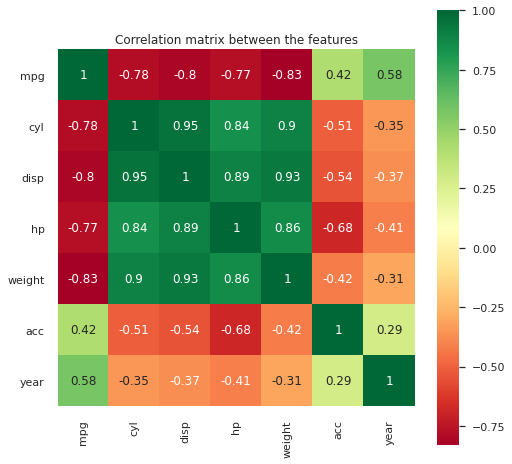

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = auto.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [281]:
#Lets check the model year, here for predicting milage model age will be needed than model year.
#Lets create a new feature
auto['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [282]:
import datetime
auto['year'] = auto['year']+1900 # To conver this to YYYY
auto['age'] = (datetime.datetime.now().year)-auto['year']
#And drop year
auto.drop(['year'],axis=1,inplace=True)

In [283]:
#Lets check the origin groups
auto.origin.unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [284]:
#changing origins to numbers
auto['origin'] = auto['origin'].replace('US',1)
auto['origin'] = auto['origin'].replace('Europe',2)
auto['origin'] = auto['origin'].replace('Japan',3)
auto.head(1)

,mpg,cyl,disp,hp,weight,acc,origin,age
0,18.0,8,307.0,130.0,3504.0,12.0,1,50


In [285]:
#See the differences after some changes
auto.describe()

,mpg,cyl,disp,hp,weight,acc,origin,age
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,1.572864,43.989950
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,0.802055,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1.000000,38.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,1.000000,41.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,1.000000,44.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,2.000000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,3.000000,50.000000


In [286]:
# Multicollinearity test for variances' effect
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# get X and X dataframes based on this regression:
Y, X = dmatrices("mpg ~ cyl + disp + hp + weight + acc + origin + age", data = auto, return_type = "dataframe")
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
auto_vif=vif.iloc[1:] #remove the row for intercept 
auto_vif.round(2)

,VIF Factor,features
1,10.70,cyl
2,21.81,disp
3,9.04,hp
4,10.51,weight
5,2.51,acc
6,1.74,origin
7,1.24,age


In [287]:
#add a new column category next to the mpg group. 
mpggroup = pd.cut(auto.mpg,bins=[8,23,47],labels=['0','1'])
auto.insert(1,'mpggroup',mpggroup)
auto.drop(['mpg'],axis=1,inplace=True)
auto.head(1)

,mpggroup,cyl,disp,hp,weight,acc,origin,age
0,0,8,307.0,130.0,3504.0,12.0,1,50


In [288]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mpggroup  398 non-null    category
 1   cyl       398 non-null    int64   
 2   disp      398 non-null    float64 
 3   hp        398 non-null    float64 
 4   weight    398 non-null    float64 
 5   acc       398 non-null    float64 
 6   origin    398 non-null    int64   
 7   age       398 non-null    int64   
dtypes: category(1), float64(4), int64(3)
memory usage: 22.4 KB


**Test and Train Sets**

In [289]:
import seaborn as sns
from sklearn import neighbors, datasets, preprocessing, decomposition, metrics, tree, svm, linear_model, model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, learning_curve, ShuffleSplit, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
import pandas.util.testing as tm
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
%matplotlib inline

# Generate a 2d classification dataset
X = auto[['cyl', 'disp', 'hp', 'weight', 'acc', 'origin', 'age']]  # Features
y = auto['mpggroup']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.8)

**Logistic Regression**

In [290]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

In [291]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[35,  7],
       [ 8, 30]])

Text(0.5, 257.44, 'Predicted label')

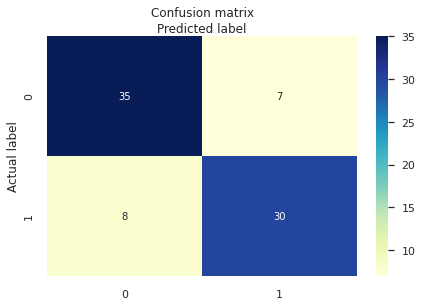

In [292]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



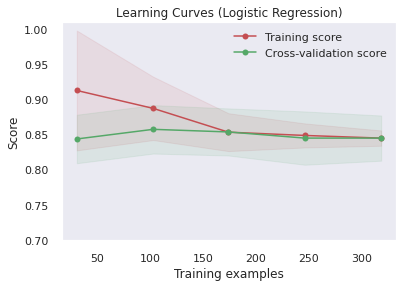

In [293]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Logistic Regression)"

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [294]:
#Let's try to predict the first 10 digits in X_test and compare them with the true labels from y_test:
Clf = LogisticRegression()
Clf.fit(X_train, y_train)
print('First 10 actual values   :', Clf.predict(X_test[0:10]))

First 10 actual values   : ['1' '1' '1' '0' '1' '1' '1' '0' '1' '0']


In [295]:
print('First 10 predicted values:',y_test[0:10])

First 10 predicted values: 143    1
182    1
396    1
136    0
203    1
383    1
350    1
128    0
129    1
176    0
Name: mpggroup, dtype: category
Categories (2, object): [0 < 1]


In [296]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8125


Hyperparameter Tuning for Logistic Regression

In [297]:
#Let us see firstly the parameters
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [298]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'C' : np.logspace(-4, 4, 20),
     'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter' : [100, 1000,2500, 5000]
    }
]

In [299]:
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)

In [300]:
best_clf = clf.fit(X, y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 2636 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4036 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  2.6min finished


In [301]:
#Best parameters are
best_clf.best_estimator_

LogisticRegression(C=0.0006951927961775605, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [302]:
#Best score with these parameters
best_clf.score(X,y)

0.8944723618090452

In [303]:
#The new accuracy is
logreg = LogisticRegression(C=0.0006951927961775605, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9



Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



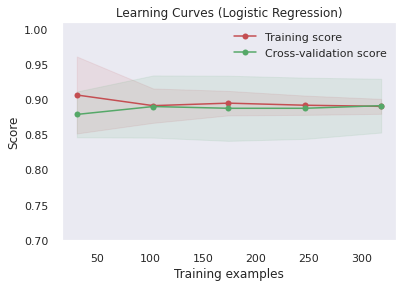

In [304]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Logistic Regression)"

estimator = LogisticRegression(C=0.0006951927961775605, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

**Naive Bayes**

In [305]:
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [306]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[35,  7],
       [ 2, 36]])

Text(0.5, 257.44, 'Predicted label')

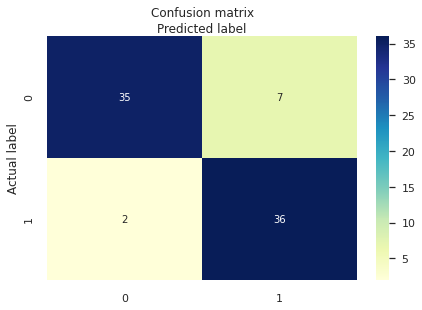

In [307]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



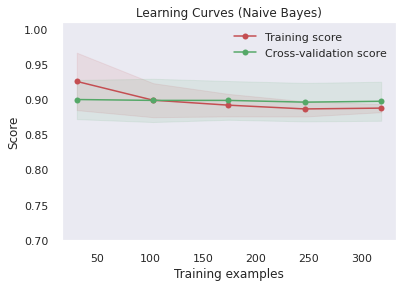

In [308]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Naive Bayes)"

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [309]:
#Let's try to predict the first 10 digits in X_test and compare them with the true labels from y_test:
Clf = GaussianNB()
Clf.fit(X_train, y_train)
print('First 10 actual values   :', Clf.predict(X_test[0:10]))

First 10 actual values   : ['1' '1' '1' '0' '1' '1' '1' '0' '1' '0']


In [310]:
print('First 10 predicted values:',y_test[0:10])

First 10 predicted values: 143    1
182    1
396    1
136    0
203    1
383    1
350    1
128    0
129    1
176    0
Name: mpggroup, dtype: category
Categories (2, object): [0 < 1]


In [311]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8875


Hyperparameter Tuning for Naive Bayes

In [312]:
#Let us see firstly the parameters
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [313]:
hyper = {}

gd = GridSearchCV(estimator = GaussianNB(), param_grid=hyper, verbose=True)

gd.fit(X,y)
print(gd.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
GaussianNB(priors=None, var_smoothing=1e-09)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [314]:
best_gd = gd.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [315]:
#Best parameters are
best_gd.best_estimator_

GaussianNB(priors=None, var_smoothing=1e-09)

In [316]:
#Best score with these parameters
best_gd.score(X,y)

0.8894472361809045

In [317]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#learning curve will also be the same

Accuracy: 0.8875


**Decision Tree**

In [318]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier()
# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = tree.predict(X_test)

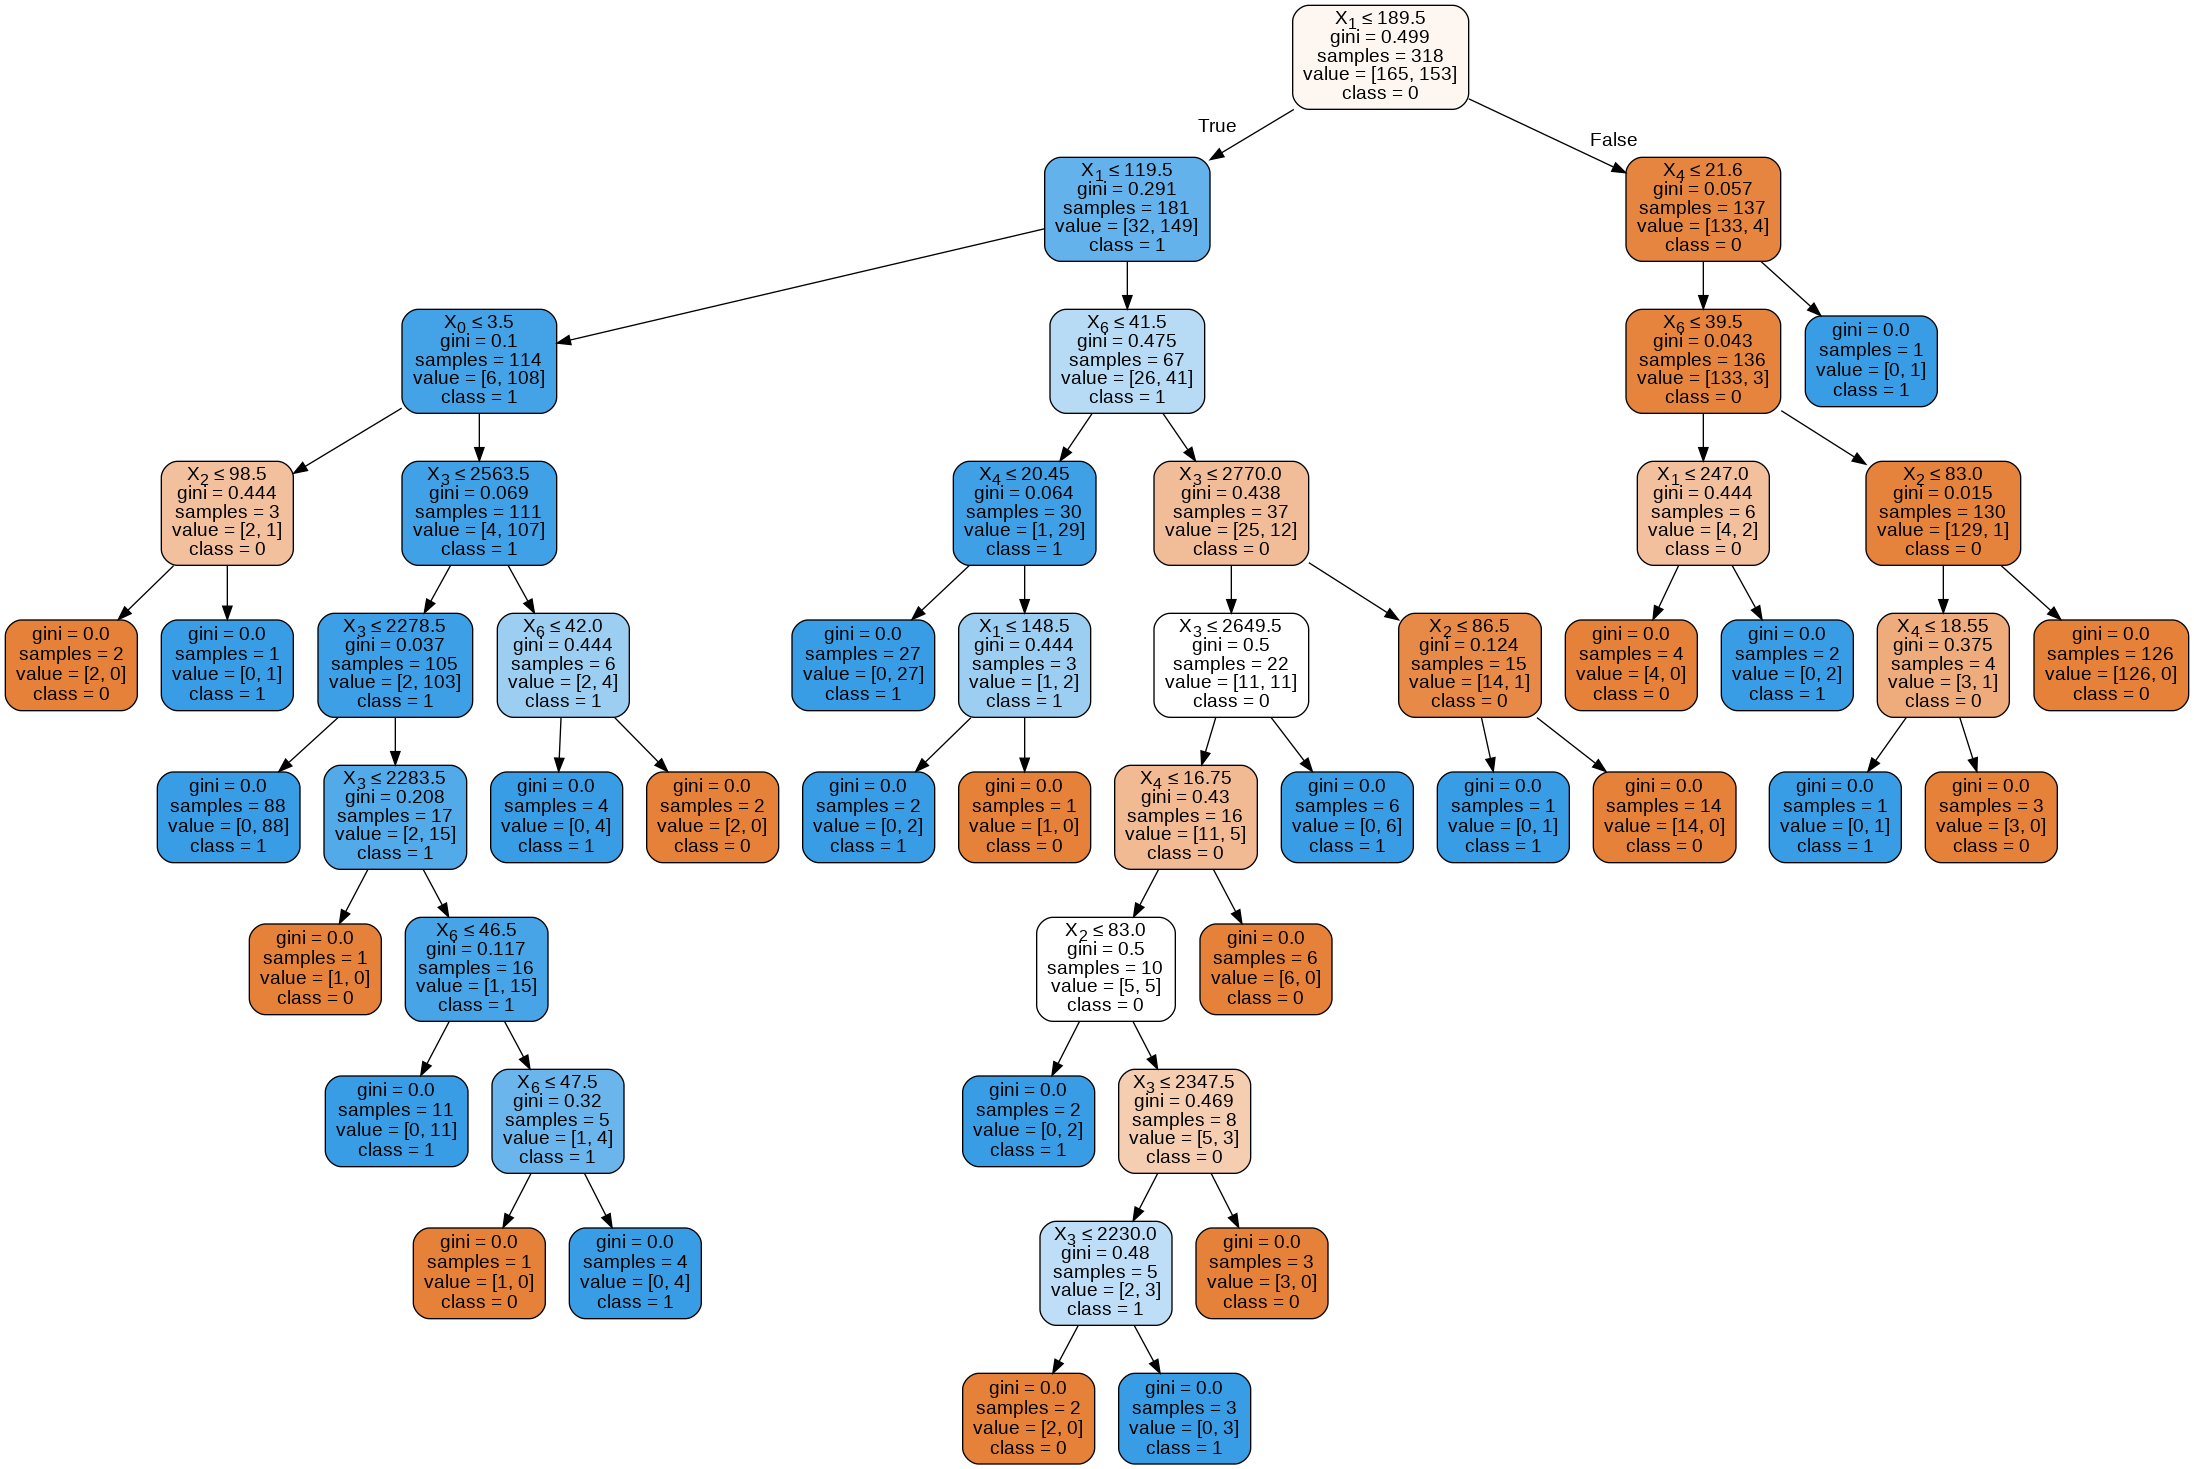

In [319]:
#Tree structure is:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('auto.png')
Image(graph.create_png())

In [320]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[39,  3],
       [ 5, 33]])

Text(0.5, 257.44, 'Predicted label')

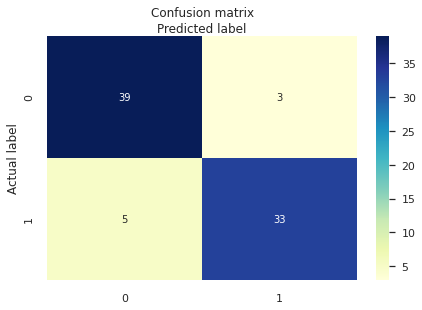

In [321]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



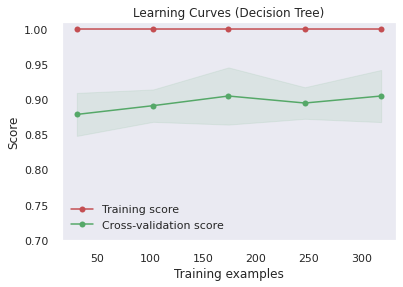

In [322]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Decision Tree)"

estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [323]:
#Let's try to predict the first 10 digits in X_test and compare them with the true labels from y_test:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
print('First 10 actual values   :', Tree.predict(X_test[0:10]))

First 10 actual values   : ['1' '1' '1' '0' '1' '1' '1' '0' '1' '0']


In [324]:
print('First 10 predicted values:',y_test[0:10])

First 10 predicted values: 143    1
182    1
396    1
136    0
203    1
383    1
350    1
128    0
129    1
176    0
Name: mpggroup, dtype: category
Categories (2, object): [0 < 1]


In [325]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


Hyperparameter Tuning for Decision Tree

In [326]:
#Let us see firstly the parameters
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [327]:
    """
    Outputs a decision tree model as a Python function
    Parameters:
    -----------
    tree: decision tree model
    The decision tree to represent as a function
    feature_names: list
    The feature names of the dataset used for building the decision tree
    """

# load some libraries again to not get error
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Create an scaler object
sc = StandardScaler()

# Create a pca object
pca = decomposition.PCA()

# Create a logistic regression object with an L2 penalty
decisiontree = tree.DecisionTreeClassifier()

# Create a pipeline of three steps. First, standardize the data.
# Second, tranform the data with PCA.
# Third, train a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('sc', sc),
                           ('pca', pca),
                           ('decisiontree', decisiontree)])

# Create Parameter Space
# Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X.shape[1]+1,1))

# Create lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]

# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                  decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
clf = GridSearchCV(pipe, parameters)

# Fit the grid search
clf.fit(X, y)

# View The Best Parameters
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['decisiontree'])

# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X, y, cv=4, n_jobs=-1)

Best Number Of Components: 5

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [328]:
#The best score with parameters above
clf.best_score_

0.8544303797468356

In [329]:
#The new accuracy is
# Create Decision Tree classifer object
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = tree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9



Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



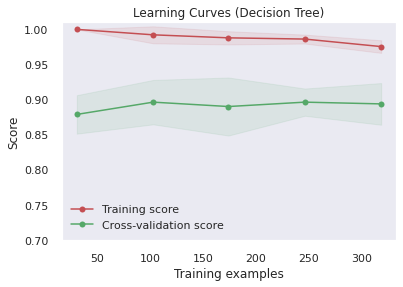

In [330]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Decision Tree)"

estimator = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

**kNN**

In [331]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
mpg_encoded=le.fit_transform(mpggroup)
print(mpg_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


In [332]:
#Create KNN Classifier
knn = KNeighborsClassifier()
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625


In [333]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[35,  7],
       [ 4, 34]])

Text(0.5, 257.44, 'Predicted label')

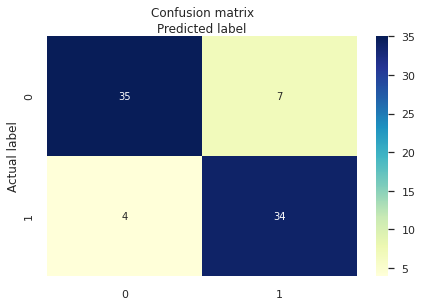

In [334]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



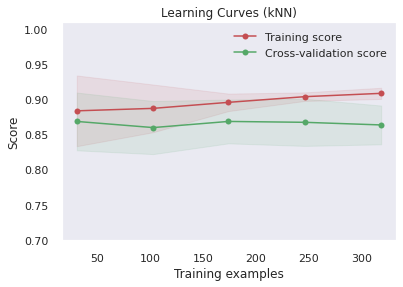

In [335]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (kNN)"

estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [336]:
#Let's try to predict the first 10 digits in X_test and compare them with the true labels from y_test:
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
print('First 10 actual values   :', kNN.predict(X_test[0:10]))

First 10 actual values   : ['1' '1' '1' '0' '1' '1' '1' '0' '1' '0']


In [337]:
print('First 10 predicted values:',y_test[0:10])

First 10 predicted values: 143    1
182    1
396    1
136    0
203    1
383    1
350    1
128    0
129    1
176    0
Name: mpggroup, dtype: category
Categories (2, object): [0 < 1]


Hyperparameter Tuning for kNN

In [338]:
#Let us see the parameters
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [339]:
scaler = preprocessing.StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

kfolds = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=50)
cv_scores = [] ; training_scores = []
print(' k   CV-mean-score  95% CI')
knnindex = np.arange(1, 30, 2)

for k in knnindex:
    Clf = KNeighborsClassifier(n_neighbors = k) 
    scores = model_selection.cross_val_score(Clf, X_train, y_train, cv=kfolds, scoring='accuracy')
    cv_scores.append(scores.mean()) 
    print('%2d   %.3f          %.3f' %(k, scores.mean(), scores.std()) )
    Clf.fit(X_train, y_train)
    training_scores.append(accuracy_score(y_train, Clf.predict(X_train)))
    
MSEv = [1 - x for x in cv_scores]
MSEt = [1 - x for x in training_scores]
optimal_k = knnindex[MSEv.index(min(MSEv))] 
print("The optimal number of neighbors is %d" % optimal_k)

 k   CV-mean-score  95% CI
 1   0.877          0.023
 3   0.874          0.022
 5   0.877          0.008
 7   0.877          0.008
 9   0.874          0.022
11   0.884          0.016
13   0.881          0.012
15   0.884          0.029
17   0.887          0.028
19   0.887          0.034
21   0.887          0.034
23   0.884          0.029
25   0.884          0.022
27   0.881          0.018
29   0.884          0.016
The optimal number of neighbors is 17


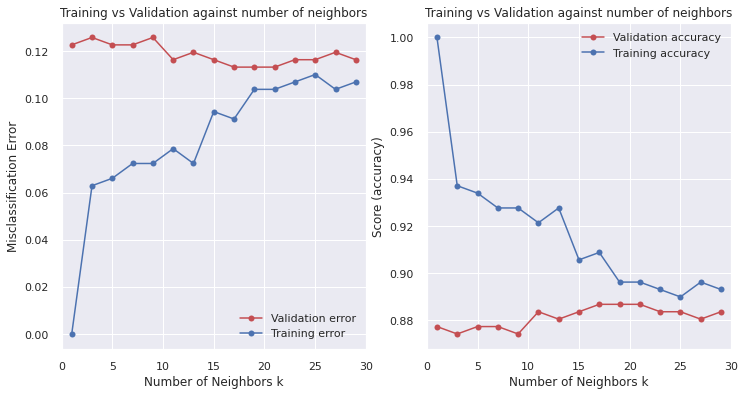

In [340]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
sns.set()
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(knnindex,MSEv, marker='o', markersize=6, color='r', label='Validation error')
plt.plot(knnindex,MSEt, marker='o', markersize=6, color='b', label='Training error')
plt.title('Training vs Validation against number of neighbors')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Misclassification Error')
plt.legend(loc='lower right')
plt.xlim(0,max(knnindex)+1)

plt.subplot(1, 2, 2)
plt.plot(knnindex,cv_scores, marker='o', markersize=6, color='r', 
         label='Validation accuracy')
plt.plot(knnindex,training_scores, marker='o', markersize=6, color='b', 
         label='Training accuracy')
plt.title('Training vs Validation against number of neighbors')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Score (accuracy)')
plt.legend(loc='upper right')
plt.xlim(0,max(knnindex)+1)

plt.show()

In [341]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


In [342]:
#Let us see the best score with parameters above
clf.best_score_

0.8869230769230769

In [343]:
#The new accuracy with best hyperparameters:
#Create KNN Classifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9375



Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



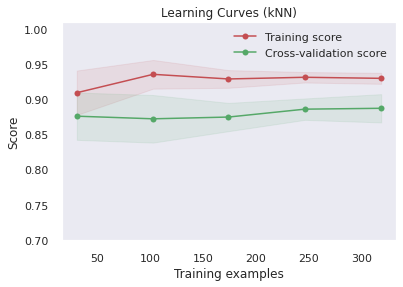

In [344]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (kNN)"

estimator = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

**Support Vector Machine**

In [345]:
#Create a svm Classifier
clf = svm.SVC()
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.925


In [346]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[37,  5],
       [ 1, 37]])

Text(0.5, 257.44, 'Predicted label')

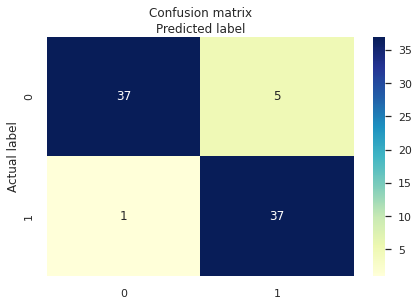

In [347]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



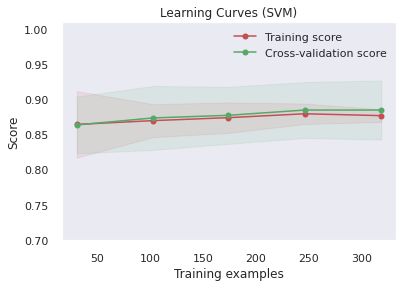

In [348]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (SVM)"

estimator = svm.SVC()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [349]:
#Let's try to predict the first 10 digits in X_test and compare them with the true labels from y_test:
clf = svm.SVC()
clf.fit(X_train, y_train)
print('First 10 actual values   :', clf.predict(X_test[0:10]))

First 10 actual values   : ['1' '1' '1' '0' '1' '1' '1' '0' '1' '0']


In [350]:
print('First 10 predicted values:',y_test[0:10])

First 10 predicted values: 143    1
182    1
396    1
136    0
203    1
383    1
350    1
128    0
129    1
176    0
Name: mpggroup, dtype: category
Categories (2, object): [0 < 1]


Hyperparameter Tuning for Support Vector Machine

In [351]:
#Let us see firstly parameters
svm.SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [352]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [353]:
print(grid.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [354]:
#The best score with parameters above
grid.best_score_

0.9309027777777779

In [355]:
#New accuracy with tuning
#Create a svm Classifier
clf = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9125


**Random Forest**

In [357]:
forest = RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
forest.fit(X_train,y_train)
# prediction on test set
y_pred=forest.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9375


In [358]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38,  4],
       [ 1, 37]])

Text(0.5, 257.44, 'Predicted label')

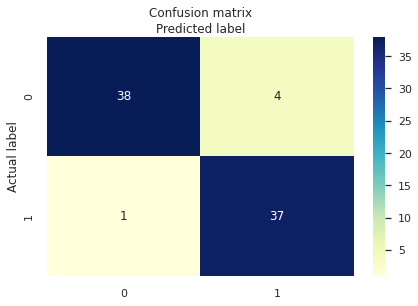

In [359]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



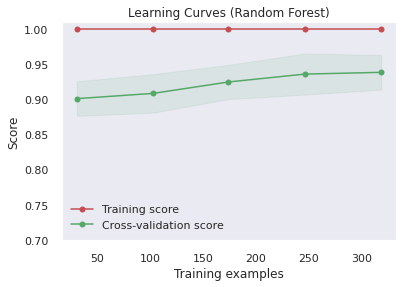

In [360]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [361]:
#Let's try to predict the first 10 digits in X_test and compare them with the true labels from y_test:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print('First 10 actual values   :', clf.predict(X_test[0:10]))

First 10 actual values   : ['1' '1' '1' '0' '1' '1' '1' '0' '1' '0']


In [362]:
print('First 10 predicted values:',y_test[0:10])

First 10 predicted values: 143    1
182    1
396    1
136    0
203    1
383    1
350    1
128    0
129    1
176    0
Name: mpggroup, dtype: category
Categories (2, object): [0 < 1]


Hyperparameter Tuning for Random Forest

In [363]:
#Let us see the parameters
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [364]:
#Some explanations for parameters:

#criterion = the function used to evaluate the quality of a split.
#max_depth = maximum number of levels allowed in each tree.
#max_features = maximum number of features considered when splitting a node.
#min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
#min_samples_split = minimum number of samples necessary in a node to cause node splitting.
#n_estimators = number of trees in the ensemble.

In [365]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [366]:
forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                class_weight=None, criterion='gini',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0, min_impurity_split=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
forest.fit(X_train,y_train)
# prediction on test set
y_pred=forest.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9375


In [367]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.9min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 200}

In [368]:
forest = RandomForestClassifier(bootstrap=True, max_depth=100, max_features=3,
                                min_samples_leaf=5, min_samples_split=12, 
                                n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
forest.fit(X_train,y_train)
# prediction on test set
y_pred=forest.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.925



Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



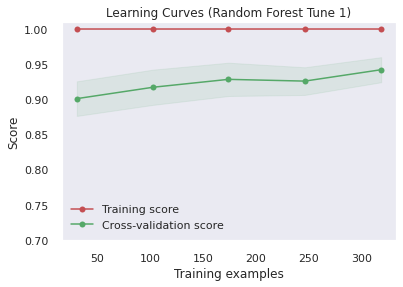

In [369]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest Tune 1)"

estimator = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                class_weight=None, criterion='gini',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0, min_impurity_split=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()


Outputs a decision tree model as a Python function
Parameters:
-----------
tree: decision tree model
The decision tree to represent as a function
feature_names: list
The feature names of the dataset used for building the decision tree



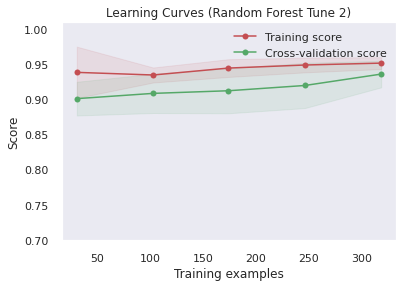

In [370]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest Tune 2)"

estimator = RandomForestClassifier(bootstrap=True, max_depth=100, max_features=3,
                                min_samples_leaf=5, min_samples_split=12, 
                                n_estimators=100)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()